In [171]:
import os

import csv
f = '/export/home/cond-text-gen/xsum-bart_results_all_convert.csv'


with open(f, 'r') as csvfile:
    reader = csv.reader(csvfile)
    data = []
    for row in reader:
        head = row
        break
    for row in reader:
        data.append(row)


In [172]:
import pandas as pd
import numpy as np
df = pd.read_csv(f)

In [173]:
conditions = ['_-1.0_out', '_0.0_out', '_1.0_out', '_0.5_out', "False_0.0_0.0_", "False_0.0_0.01", "False_0.0_0.05", "False_0.0_0.1", "False_0.0_0.2", "10_10","10_5" ]
name = ["score-1" ,"score0" ,"score1" ,"score0.5", "tmp0", "tmp0.01","tmp0.05", "tmp0.1", "tmp0.2" ,"group10", "group5" ]
for cond, n in zip(conditions,name):
    df[n] = df.apply(
    lambda row: 1 if cond in row['name'] else 0,
    axis=1
)


In [174]:

import statistics

df['avgR'] = df.apply(lambda row: statistics.mean([row['sp1_1_r1'] ,row['sp1_1_r2'] ,row['sp1_1_rl'] ]), axis=1)
df['avgD'] = df.apply(lambda row: statistics.mean([row['distinct_1'] ,row['distinct_2'] ,row['distinct_3'] ]), axis=1)
df['value'] = df.apply(lambda row: row['avgR'] +row['avgD'] , axis=1)


print(df.head())
print(df.columns)

                                                name        num   uniq_num  \
0  xsum-bart_bfs_30_10_5_False_0.0_0.05_5_None_1....  17.435398  17.419469   
1  xsum-bart_bfs_30_10_10_False_0.0_0.0_10_None_1...   3.261947   3.261947   
2  xsum-bart_bfs_30_10_5_False_0.0_0.05_5_None_1....   8.251327   8.251327   
3  xsum-bart_bfs_30_10_5_False_0.0_0.2_5_None_1.0...  20.638938  20.615929   
4  xsum-bart_bfs_30_10_10_False_0.0_0.2_10_None_1...   3.373451   3.373451   

        null  distinct_1  distinct_2  distinct_3  ref_distinct_1  \
0  99.646018   19.374131   25.333839   27.657042        9.561359   
1  99.646018   22.591181   24.669448   23.668497        9.561359   
2  99.823009   17.786125   20.995805   21.913092        9.561359   
3  99.646018   18.893489   24.799126   27.058341        9.561359   
4  99.646018   22.169273   24.208763   23.266125        9.561359   

   ref_distinct_2  ref_distinct_3  ...  tmp0  tmp0.01  tmp0.05  tmp0.1  \
0        9.480752         8.98271  ...     0    

In [175]:
data = df.to_dict('index')
print(data[0])

{'name': 'xsum-bart_bfs_30_10_5_False_0.0_0.05_5_None_1.0_1_0.05_-1.0_output.json', 'num': 17.435398230088495, 'uniq_num': 17.419469026548672, 'null': 99.64601769911505, 'distinct_1': 19.374130883447076, 'distinct_2': 25.333838512276355, 'distinct_3': 27.65704224757689, 'ref_distinct_1': 9.56135865269108, 'ref_distinct_2': 9.480751851384873, 'ref_distinct_3': 8.982710276450078, 'oracle_r1': 47.78203350691037, 'oracle_r2': 23.621285061454447, 'oracle_rl': 39.555845733697204, 'sp1_1_r1': 38.981782574913275, 'sp1_1_r2': 15.510934953503945, 'sp1_1_rl': 30.372317803852933, 'sp1_1_mauve': 99.82522560116655, 'sp1_1_gram': 95.06263114101722, 'sp1_1_meteor': 32.407543853371074, 'sp1_1_bleu': 9.251565294554755, 'score-1': 1, 'score0': 0, 'score1': 0, 'score0.5': 0, 'tmp0': 0, 'tmp0.01': 0, 'tmp0.05': 1, 'tmp0.1': 0, 'tmp0.2': 0, 'group10': 0, 'group5': 1, 'avgR': 28.28834511075672, 'avgD': 24.121670547766772, 'value': 52.41001565852349}


In [176]:
map_of_name = {
    'tmp0': "0.0",
    'tmp0.05':"0.05",
    'tmp0.01':"0.01",
    'tmp0.1':"0.1",
    'tmp0.2':"0.2",
    'score-1':"Memoryless",
    # 'score0':r'α=0',
    'score1':r'α=1',
    'score0.5':r'α=0.5',
    'group5':r'k=5',
    'group10':r'k=10'
}
def extract(keyword, ex):
    mykey = ""
    for key in ex.keys():
        if key.startswith(keyword) and key in map_of_name and ex[key]:
            # print(key)
            return map_of_name[key]
# extract("tmp")

for k in data.keys():
    d = data[k]
    tmp_val = extract("tmp", d)
    data[k]["temp"] = tmp_val
    grp_val = extract("group", d)
    data[k]["group"] = grp_val
    score_val = extract("score", d)
    data[k]["score"] = score_val
new_df = pd.DataFrame.from_dict(data,orient='index')



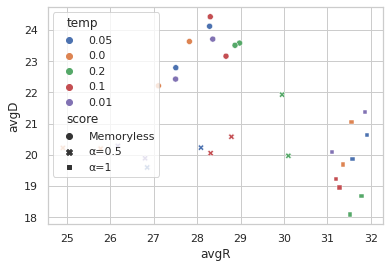

In [177]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")


sns.scatterplot(data=new_df, x="avgR", y="avgD", style="score", hue="temp")
plt.show()

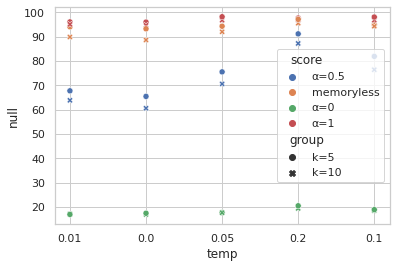

In [120]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.scatterplot(data=new_df, x="temp", y="null", style="group", hue="score")
plt.show()

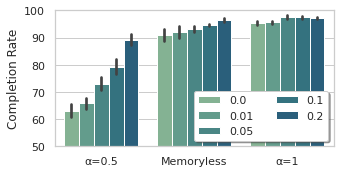

In [170]:
# plot_order = new_df.sort_values(by='temp', ascending=False)
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(5,2.5))
pal = sns.color_palette("crest")

ax = sns.barplot(data=new_df, x="score", y="null", hue="temp",hue_order = ["0.0","0.01","0.05","0.1","0.2"], palette=pal)
# plt.legend(loc='upper right')
ax.legend(ncol=2, fancybox=True, shadow=True, loc='lower right')
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),ncol=3, fancybox=True, shadow=True)
ax.set_ylabel("Completion Rate")
ax.set_xlabel(None)
plt.ylim([50, 100])


plt.savefig("fig_temp.pdf", dpi=500,bbox_inches='tight')
plt.show()



In [70]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals

# avgD, avgR 
# 'go-', label='line 1',
keyword = "group" # plot dots with this key  
keyword = "tmp" # plot dots with this key  
keyword = "score" # plot dots with this key  

xname = "avgD"
yname = "avgR"
# xname = "avgD"
# yname = "value"
result = {}
# create dict
for d in data.values():
    for k,v in d.items():
        if k.startswith(keyword):
            result[k] = []
    break

# create dict
for d in data.values():
    # identify whick key is activated
    mykey = ""
    for key in result.keys():
        if d[key]:
            mykey = key
            break
    result[mykey].append([d[xname], d[yname]])

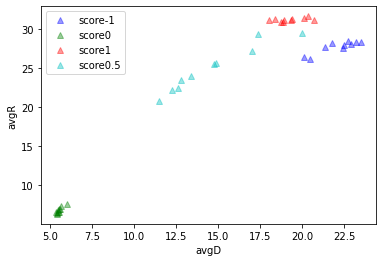

In [71]:
colors = ['b','g','r','c','m']
# red dashes, blue squares and green triangles
cnt = 0
for key in result.keys():
    plt.plot([ex[0] for ex in result[key]], [ex[1] for ex in result[key]], f"{colors[cnt]}^", label=key,alpha=0.4)
    cnt +=1
plt.legend()
plt.ylabel(yname)
plt.xlabel(xname)
plt.show()

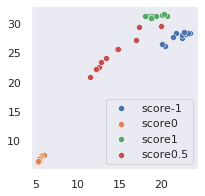

In [84]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")
colors = sns.color_palette("deep")



f, ax = plt.subplots(figsize=(3, 3))

cnt = 0
for key in result.keys():
    # plt.plot([ex[0] for ex in result[key]], [ex[1] for ex in result[key]], f"{colors[cnt]}^", label=key,alpha=0.4)
    sns.scatterplot(x=[ex[0] for ex in result[key]], y=[ex[1] for ex in result[key]],label=key,color=colors[cnt])
    cnt +=1
plt.legend()

# Draw a combo histogram and scatterplot with density contours


# sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
# sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)